# Chapter 3 Homework

Problems use samples from the posterior for the globe tossing distribution

In [19]:
library(rethinking)

Loading required package: rstan
Loading required package: ggplot2
Loading required package: StanHeaders
rstan (Version 2.17.3, GitRev: 2e1f913d3ca3)
For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)
Loading required package: parallel
rethinking (Version 1.72)


In [2]:
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1, 1000)
likelihood <- dbinom(6, size=9, prob=p_grid)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
set.seed(100)
samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)

## Easy Problems

### 3E1. How much posterior probability lies below $p=0.2$?

In [6]:
length(samples[samples < 0.2]) / length(samples)

[1] 5e-04

### 3E2. How much posterior probability lies above $p=0.8$?

In [8]:
length(samples[samples > 0.8]) / length(samples)

[1] 0.1117

### 3E3. How much posterior probability lies between $p=0.2$ and $p=0.8$?

In [9]:
1 - 5e-4 - 0.1117

[1] 0.8878

### 3E4. 20% of the posterior probability lies below which value of $p$?

In [17]:
quantile(samples, probs = 0.2)

20% 
0.5195195

### 3E5. 20% of the posterior probability lies above which value of $p$?

In [18]:
quantile(samples, probs = 0.8)

80% 
0.7567568

### 3E6. Which values of $p$ contain the narrowest interval equal to 66% of the posterior probability?

In [21]:
HPDI(samples, 0.66)

|0.66     0.66| 
0.5205205 0.7847848

### 3E7. Which values of $p$ contain 66% of the posterior probability, assuming equal posterior probability both below and above the interval?

In [23]:
PI(samples, 0.66)

17%       83% 
0.5005005 0.7687688

## Medium Problems

### 3M1. Suppose the globe tossing experiment turned out to be 8 water in 15 tosses. Construct the posterior using grid approximation, using the same flat prior as before.

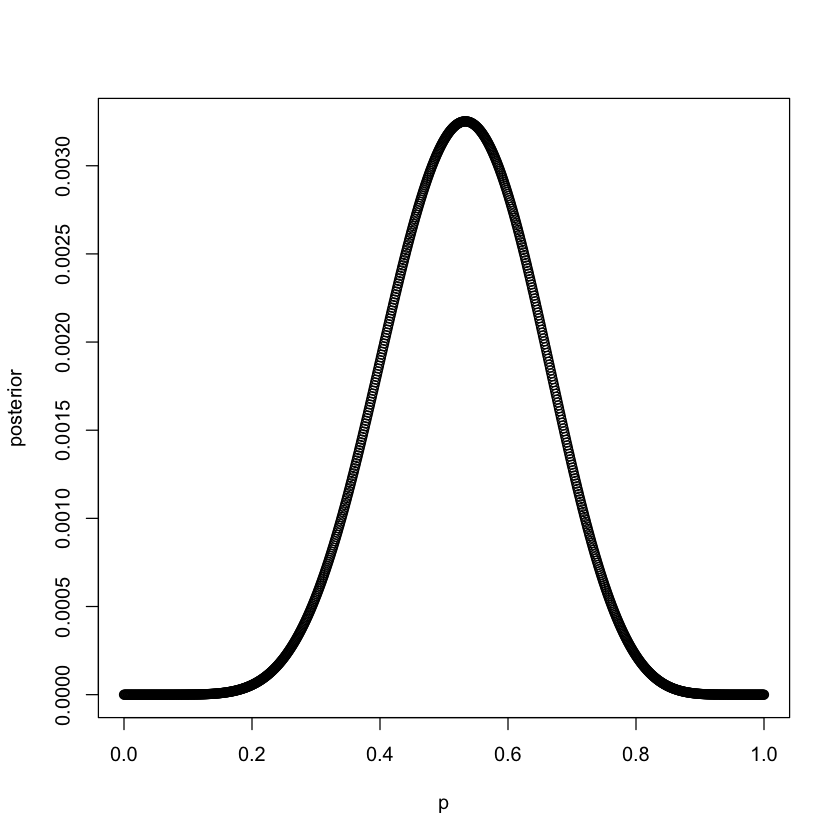

In [28]:
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- rep(1, 1000)
likelihood <- dbinom(8, size=15, prob=p_grid)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
plot(x=p_grid,
     y=posterior,
     xlab="p")

### 3M2. Draw 10,000 samples from the grid approximation from above. Then use the samples to calculate the 90% HPDI for $p$.

In [32]:
set.seed(100)
samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
HPDI(samples, prob=0.9)

|0.9      0.9| 
0.3243243 0.7157157

### 3M3. Construct the posterior predictive check for this model and data. This means simulate the distribution of samples, averaging over the posterior uncertainty in $p$. What is the probability of observing 8 water in 15 tosses?

[1] 0.1438

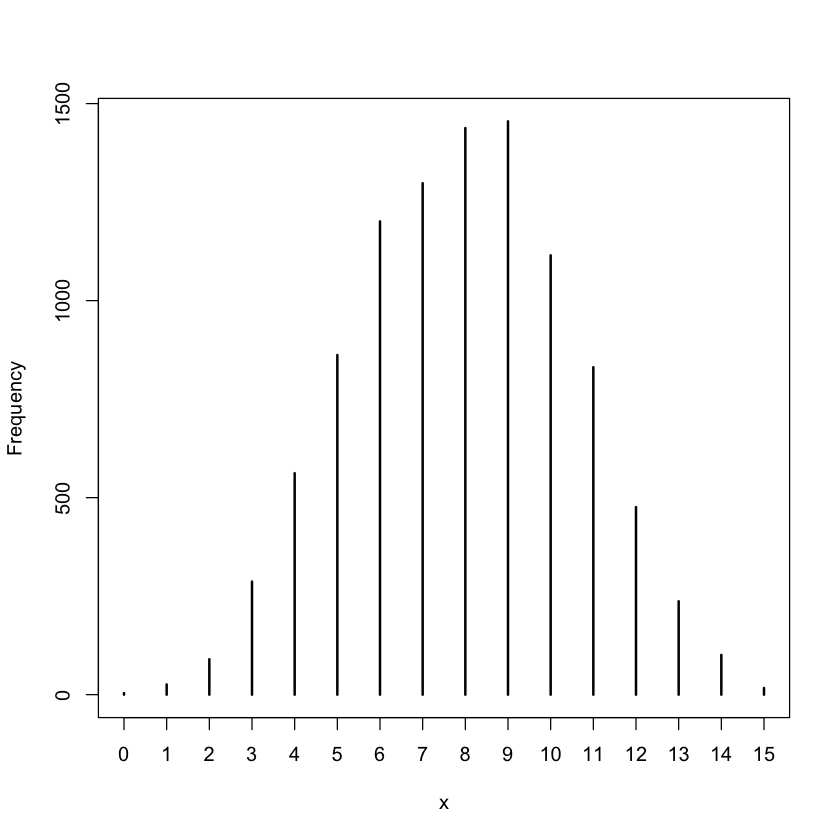

In [43]:
w <- rbinom(n=1e4, size=15, prob=samples)
simplehist(w)
length(w[w == 8]) / length(w)

### 3M4. Using the posterior distribution constructed from the new (8/15) data, now calculate the probability of observing 6 water in 9 tosses.

[1] 0.1689

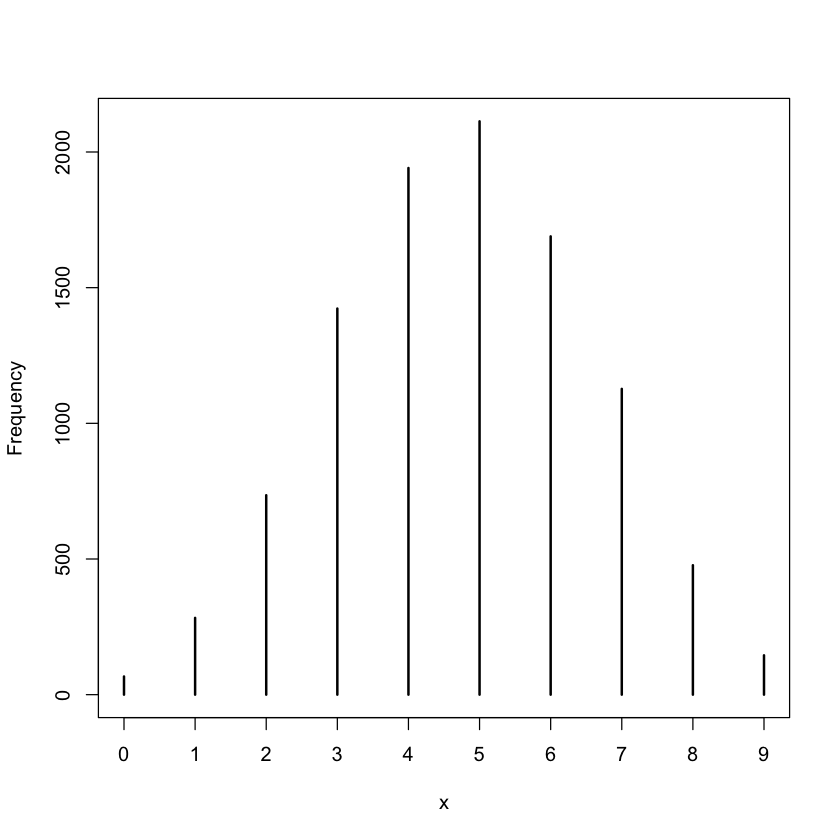

In [50]:
w <- rbinom(n=1e4, size=9, prob=samples)
simplehist(w)
length(w[w==6]) / length(w)

### Redo the medium problems, but with step function prior at 0.5. Compare the inferences.

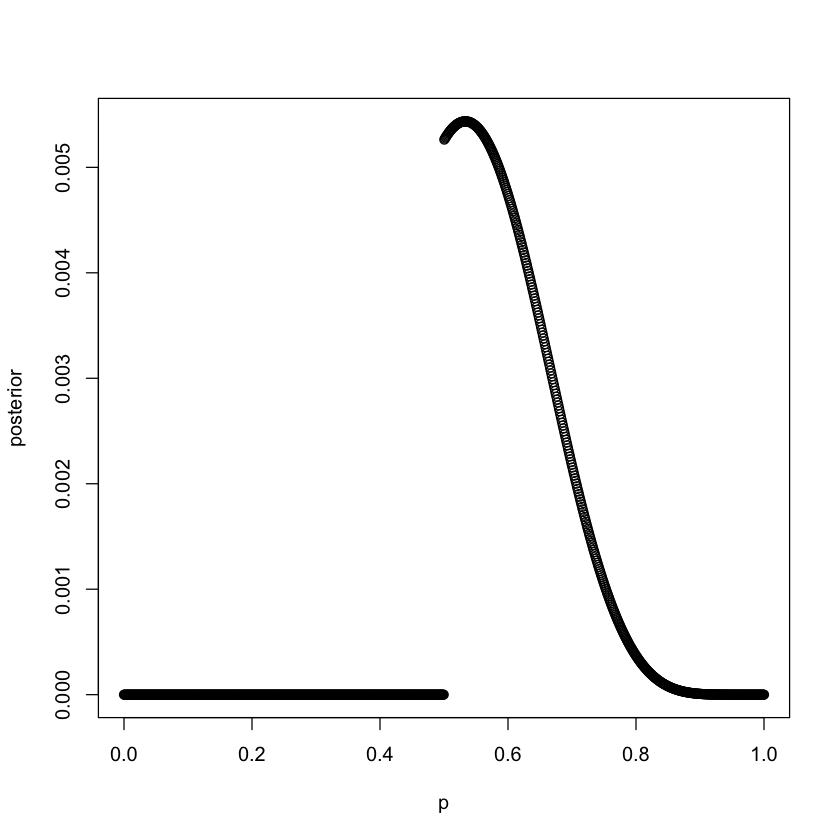

In [69]:
p_grid <- seq(from=0, to=1, length.out=1000)
prior <- ifelse(p_grid < 0.5, 0, 1)
likelihood <- dbinom(8, size=15, prob=p_grid)
posterior <- likelihood * prior
posterior <- posterior / sum(posterior)
plot(x=p_grid,
     y=posterior,
     xlab="p")

In [70]:
samples <- sample(p_grid, prob=posterior, size=1e4, replace=TRUE)
HPDI(samples, prob=0.9)

|0.9      0.9| 
0.5005005 0.7127127

[1] 0.1621

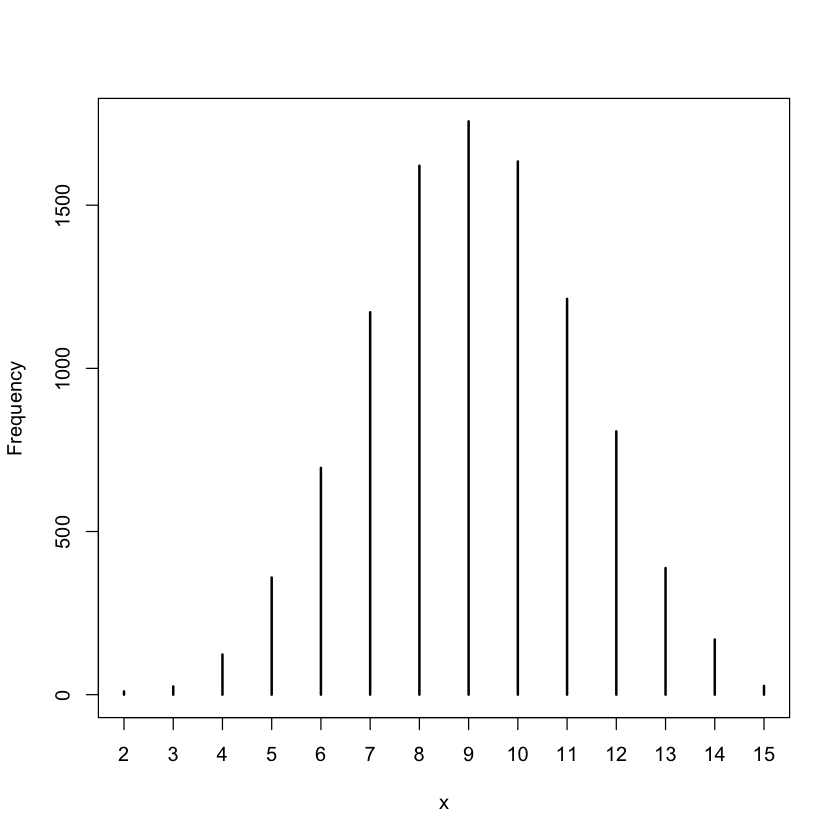

In [71]:
w <- rbinom(n=1e4, size=15, prob=samples)
simplehist(w)
length(w[w==8]) / length(w)

[1] 0.2344

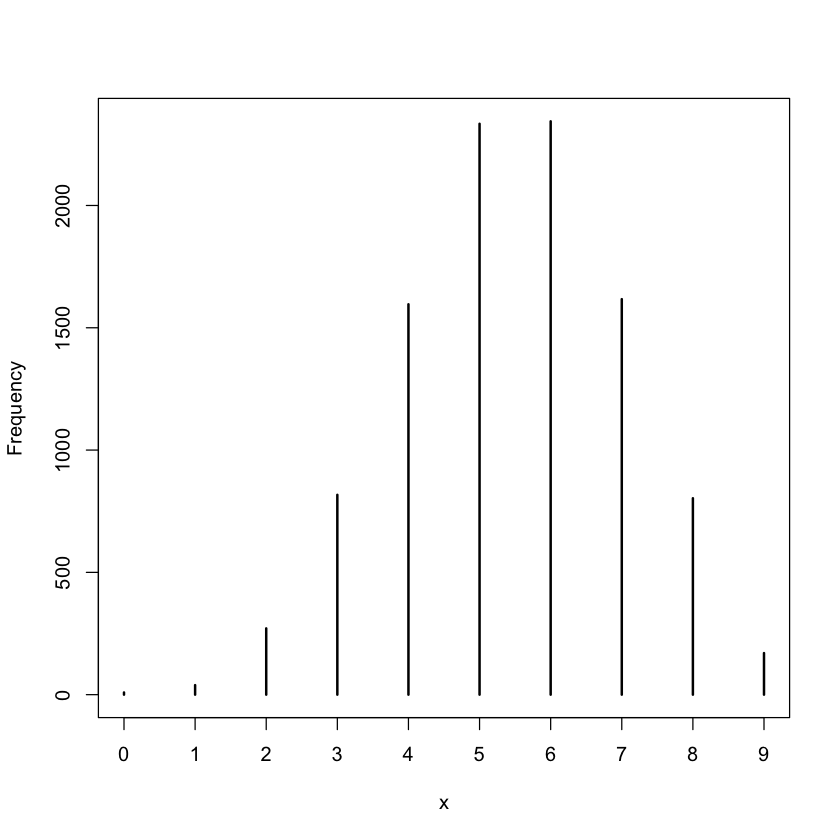

In [72]:
w <- rbinom(n=1e4, size=9, prob=samples)
simplehist(w)
length(w[w==6]) / length(w)

The better prior pushes the posterior distribution to the right, towards the "true" answer.